<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.10

Author: © 2021 Anonymous course participant

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. [How did the crime rates change in Lithuania during the lockdowns? ](#Q1)
1. [What is the correlation between covid cases and crime rates?](#Q2)
1. [Is it possible to predict the crime rates based on covid cases?](#Q3)

We additionally uses data from:
* [https://www.ird.lt/lt/paslaugos/tvarkomu-valdomu-registru-ir-informaciniu-sistemu-paslaugos/nusikalstamu-veiku-zinybinio-registro-nvzr-atviri-duomenys-paslaugos/nvzr-nusikalstamumas-pagal-savivaldybes?year=2021&month=11&municipality=0]
* [https://open-data-ls-osp-sdg.hub.arcgis.com/datasets/ba35de03e111430f88a86f7d1f351de6_0/explore]


This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Load the data

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt

Download the data to cache locally. Do this once (a day), and comment out, not to DoS the server. (adopted from https://stackoverflow.com/a/35997720).

In [2]:
import requests
fname = 'owid-covid-data.csv'
url = 'https://covid.ourworldindata.org/data/' + fname
r = requests.get(url)
open(fname, 'wb').write(r.content)

33717058

Load the file to Pandas.

In [3]:
url = "owid-covid-data.csv" 
df = pd.read_csv(url, parse_dates=[3])

In [4]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
lt_covid = df[df['location'] == 'Lithuania']
lt_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,591.000000,591.000000,586.000000,567.000000,567.000000,586.000000,591.000000,591.000000,586.000000,567.000000,...,5.910000e+02,591.0,0.0,5.910000e+02,5.910000e+02,5.910000e+02,83.000000,83.000000,83.000000,83.000000
mean,128718.844332,597.781726,592.589476,2061.028219,9.255732,8.843271,47853.326438,222.235107,220.304794,766.220811,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,4528.450602,8.900602,19.695422,1683.525252
std,124675.418525,771.319364,720.644945,1945.726360,11.890097,11.315621,46350.117022,286.750524,267.911485,723.355485,...,3.555723e-15,0.0,NaN,8.889308e-16,1.422289e-14,1.111163e-16,4022.949478,7.785089,19.541597,1495.596978
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.372000,0.000000,0.000000,0.372000,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,-568.400000,-7.220000,-8.760000,-211.311956
25%,1999.500000,24.000000,28.785500,64.000000,0.000000,0.429000,743.347000,8.922000,10.701500,23.793000,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,562.050000,2.540000,7.740000,208.951240
50%,112912.000000,281.000000,340.143000,1837.000000,4.000000,3.500000,41976.875000,104.466000,126.454000,682.935000,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,4189.600000,11.630000,14.650000,1557.552023
75%,265799.500000,896.000000,937.571500,4179.000000,14.000000,12.429000,98815.292500,333.102500,348.557500,1553.611500,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,8198.550000,15.950000,23.510000,3047.944467
max,353289.000000,3984.000000,3065.429000,5248.000000,61.000000,47.143000,131340.939000,1481.117000,1139.623000,1951.029000,...,2.130000e+01,38.0,NaN,6.560000e+00,7.593000e+01,8.820000e-01,11068.700000,17.170000,86.610000,4114.969467


In [6]:
lt_covid = lt_covid[['new_cases', 'date']]
lt_covid['year'] = pd.DatetimeIndex(lt_covid['date'].values).year
lt_covid['month'] = pd.DatetimeIndex(lt_covid['date'].values).month

lt_covid.head(5)

,new_cases,date,year,month
64995,1.0,2020-02-29,2020,2
64996,0.0,2020-03-01,2020,3
64997,0.0,2020-03-02,2020,3
64998,0.0,2020-03-03,2020,3
64999,0.0,2020-03-04,2020,3


[back to the top](#main)
<a id='Q1' name='Q1'></a>
## 1. How did the crime rates change in Lithuania during the lockdowns?

In [7]:
data_2019 = pd.read_csv('2019.csv', sep=';')
data_2020 = pd.read_csv('2020.csv', sep=';')
data_2021 = pd.read_csv('2021.csv', sep=';')

#### In this part We will analyze generic type of crime rates

In [8]:
data_2019.head(2)

,Metai,Mėnuo,Savivaldybė,Nusikalstamų veikų skaičius 100 tukstančių gyventojų,Nusikalstamų veikų skaičius 100 tukstančių gyventojų pagal sunkius nusikaltimus,Nusikalstamos veikos,Nusikalstamos veikos Ištirta (%),Nusikaltimai,Nusikaltimai Ištirta (%),Nusižengimai,...,Kelių transporto eismo saugumo ar transporto priemonių eksploatavimo taisyklių pažeidimai - 281 str.,Kelių transporto eismo saugumo ar transporto priemonių eksploatavimo taisyklių pažeidimai - 281 str. Ištirta (%),"Eismo saugumo taisyklių pažeidimai, dėl kurių žuvo žmogus ( 281 str. 5, 6 d.)","Eismo saugumo taisyklių pažeidimai, dėl kurių žuvo žmogus ( 281 str. 5, 6 d.) Ištirta (%)",Viešosios tvarkos pažeidimai - 284 str.,Viešosios tvarkos pažeidimai - 284 str. Ištirta (%),"Nusikalstamos veikos, susijusios su psichotropinėmis ir narkotinėmis medžiagomis","Nusikalstamos veikos, susijusios su psichotropinėmis ir narkotinėmis medžiagomis Ištirta (%)","Nusikalstamos veikos, padarytos narkotinio ar psichotropinio apsvaigimo būklėje","Nusikalstamos veikos, padarytos narkotinio ar psichotropinio apsvaigimo būklėje Lyg. dalis"
0,2019,Sausis - Rugsėjis,Respublika,1405.0,75.2,39226,49.2,36304,48.6,2922,...,1611,80.1,98,44.9,1437,58.5,2308,57.0,367,1.5
1,2019,Sausis - Rugpjūtis,Respublika,1260.4,67.8,35190,48.5,32644,47.8,2546,...,1535,80.8,89,46.8,1307,56.8,2018,56.9,334,1.6


#### The dataset contains many different columns about various crime rates, investigates cases and etc.
#### The most important columns are: Month, district and Nusikalstamos veikos.
#### Cumulative sum of crimes

### We drop all columns that contain substring: Ištirta or Lyg. dalis
### These columns are not relevant for the analysis

In [9]:
drop_columns = [col for col in data_2019.columns if 'Ištirta' in col or 'Lyg. dalis' in col]
crime_data_2019 = data_2019.drop(labels=drop_columns, axis=1)
crime_data_2020 = data_2020.drop(labels=drop_columns, axis=1)
crime_data_2021 = data_2021.drop(labels=drop_columns, axis=1)

print(f'Before we had {data_2019.shape[1]} columns and now we have {crime_data_2019.shape[1]}')

Before we had 61 columns and now we have 33


## Since we have monthly cumulative sum, we will find how many crimes were commited each month

In [10]:
month_name_mapping = {'Sausis': 1, 'Vasaris': 2, 'Kovas': 3, 'Balandis': 4, 
                        'Gegužė': 5, 'Birželis': 6, 'Liepa': 7, 'Rugpjūtis': 8,
                        'Rugsėjis': 9, 'Spalis': 10, 'Lapkritis': 11, 'Gruodis': 12}

reverse_month_name_mapping = {v:k for k, v in month_name_mapping.items()}


def add_month_values(month_name_mapping, df):
    month = [month_name_mapping.get(month_range.split(' - ')[1], None)\
         for month_range in df['Mėnuo'].values]
    df['Month'] = month
    df.sort_values(by=['Savivaldybė', 'Month'], ascending=True, inplace=True)

add_month_values(month_name_mapping, crime_data_2019)
add_month_values(month_name_mapping, crime_data_2020)
add_month_values(month_name_mapping, crime_data_2021)

crime_data_2019.head(2)

,Metai,Mėnuo,Savivaldybė,Nusikalstamų veikų skaičius 100 tukstančių gyventojų,Nusikalstamų veikų skaičius 100 tukstančių gyventojų pagal sunkius nusikaltimus,Nusikalstamos veikos,Nusikaltimai,Nusižengimai,Sunkūs ir labai sunkūs nusikaltimai,"Nusikalstamos veikos, padarytos viešose vietose",...,Turto prievartavimai - 181 str.,Sukčiavimai - 182 str.,Kontrabanda - 199 str.,"Neteisėtas namų gamybos stiprių alkoholinių gėrimų ir aparatų jiems gaminti gaminimas, laikymas, gabenimas turint tikslų realizuoti ar realizavimas - 201 str.",Kelių transporto eismo saugumo ar transporto priemonių eksploatavimo taisyklių pažeidimai - 281 str.,"Eismo saugumo taisyklių pažeidimai, dėl kurių žuvo žmogus ( 281 str. 5, 6 d.)",Viešosios tvarkos pažeidimai - 284 str.,"Nusikalstamos veikos, susijusios su psichotropinėmis ir narkotinėmis medžiagomis","Nusikalstamos veikos, padarytos narkotinio ar psichotropinio apsvaigimo būklėje",Month
23,2019,Sausis - Sausis,Akmenės rajonas,102.9,5.1,20,20,0,1,3,...,0,2,0,0,0,0,1,0,0,1
19,2019,Sausis - Vasaris,Akmenės rajonas,200.7,5.1,39,36,3,1,5,...,0,2,0,0,2,0,2,1,0,2


In [11]:
crime_data_2021[['Mėnuo', 'Month']].head(5)

,Mėnuo,Month
11,Sausis - Sausis,1
10,Sausis - Vasaris,2
9,Sausis - Kovas,3
8,Sausis - Balandis,4
7,Sausis - Gegužė,5


### We have cumulative sum data but in some cases the number of crimes in following month is smaller than in current month. This can mean that some crime claims were dropped or their category was changed.

In [12]:
def remove_cumulative_sum(df):
    new_df = pd.DataFrame()
    df_sorted = df.sort_values(by=['Savivaldybė', 'Month'], ascending=True)
    unique_columns =  df_sorted['Savivaldybė'].unique()
    grouped_df = df_sorted.groupby('Savivaldybė')
    cat_columns = ['Savivaldybė', 'Month', 'Mėnuo', 'Metai']

    for col in unique_columns:
        res = grouped_df.get_group(col).iloc[:, 3:-1]
        res -= res.shift(1).fillna(0)
        new_df = new_df.append(res)
    new_df[cat_columns] = df_sorted[cat_columns].values
    return new_df
        

In [13]:
crime_data = pd.DataFrame()
for dat in [crime_data_2019, crime_data_2020, crime_data_2021]:
    crime_data = crime_data.append(remove_cumulative_sum(dat))

crime_data.head(2)

,Nusikalstamų veikų skaičius 100 tukstančių gyventojų,Nusikalstamų veikų skaičius 100 tukstančių gyventojų pagal sunkius nusikaltimus,Nusikalstamos veikos,Nusikaltimai,Nusižengimai,Sunkūs ir labai sunkūs nusikaltimai,"Nusikalstamos veikos, padarytos viešose vietose","Nusikalstamos veikos, padarytos panaudojant šaunamąjį ginklą","Nusikalstamos veikos, padarytos nepilnamečių asmenų","Nusikalstamos veikos, padarytos asmenų, anksčiau padariusių nusikalstamas veikas",...,"Neteisėtas namų gamybos stiprių alkoholinių gėrimų ir aparatų jiems gaminti gaminimas, laikymas, gabenimas turint tikslų realizuoti ar realizavimas - 201 str.",Kelių transporto eismo saugumo ar transporto priemonių eksploatavimo taisyklių pažeidimai - 281 str.,"Eismo saugumo taisyklių pažeidimai, dėl kurių žuvo žmogus ( 281 str. 5, 6 d.)",Viešosios tvarkos pažeidimai - 284 str.,"Nusikalstamos veikos, susijusios su psichotropinėmis ir narkotinėmis medžiagomis","Nusikalstamos veikos, padarytos narkotinio ar psichotropinio apsvaigimo būklėje",Savivaldybė,Month,Mėnuo,Metai
23,102.9,5.1,20.0,20.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,Akmenės rajonas,1,Sausis - Sausis,2019
19,97.8,0.0,19.0,16.0,3.0,0.0,2.0,0.0,1.0,0.0,...,0.0,2.0,0.0,1.0,1.0,0.0,Akmenės rajonas,2,Sausis - Vasaris,2019


#### Creating shorter column names (max 10 words)

In [14]:
crime_data.columns = list(map(lambda x: ' '.join(x.split(' ')[:10]) if len(x.split(' ')) > 10 else x, crime_data.columns))

In [15]:
analyze_columns = crime_data.columns[:-4]

### We will analyze crimes in  2019, 2020, 2021 April and May months.
#### source: [https://lt.wikipedia.org/wiki/COVID-19_pandemija_Lietuvoje]
#### 1st lockdown: March 16 - June 17
#### 2nd lockdown: November 4 - July 1st
#### We will analyze periods from April till May

In [16]:
total_analysis_cases = crime_data[(crime_data['Month'].isin([4, 5])) & ( crime_data['Savivaldybė'] == 'Respublika')]
total_analysis_cases.head(2)

,Nusikalstamų veikų skaičius 100 tukstančių gyventojų,Nusikalstamų veikų skaičius 100 tukstančių gyventojų pagal sunkius nusikaltimus,Nusikalstamos veikos,Nusikaltimai,Nusižengimai,Sunkūs ir labai sunkūs nusikaltimai,"Nusikalstamos veikos, padarytos viešose vietose","Nusikalstamos veikos, padarytos panaudojant šaunamąjį ginklą","Nusikalstamos veikos, padarytos nepilnamečių asmenų","Nusikalstamos veikos, padarytos asmenų, anksčiau padariusių nusikalstamas veikas",...,Neteisėtas namų gamybos stiprių alkoholinių gėrimų ir aparatų jiems gaminti,Kelių transporto eismo saugumo ar transporto priemonių eksploatavimo taisyklių pažeidimai,"Eismo saugumo taisyklių pažeidimai, dėl kurių žuvo žmogus ( 281",Viešosios tvarkos pažeidimai - 284 str.,"Nusikalstamos veikos, susijusios su psichotropinėmis ir narkotinėmis medžiagomis","Nusikalstamos veikos, padarytos narkotinio ar psichotropinio apsvaigimo būklėje",Savivaldybė,Month,Mėnuo,Metai
5,163.4,9.4,4566.0,4254.0,312.0,262.0,851.0,4.0,214.0,265.0,...,8.0,79.0,11.0,170.0,263.0,44.0,Respublika,4,Sausis - Balandis,2019
4,157.8,9.1,4409.0,4085.0,324.0,255.0,851.0,2.0,178.0,309.0,...,1.0,74.0,1.0,168.0,232.0,93.0,Respublika,5,Sausis - Gegužė,2019


Text(0.5, 1.0, 'Total crime rates')

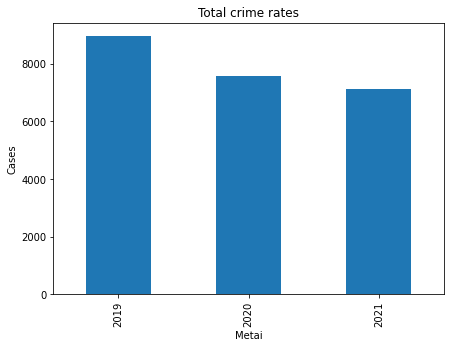

In [17]:
f, ax = plt.subplots(1, figsize=(7, 5))
total_analysis_cases.pivot_table(values='Nusikalstamos veikos', columns='Metai', aggfunc='sum').T.plot.bar(ax=ax, legend=False)
ax.set_ylabel('Cases')
ax.set_title('Total crime rates')

### Total crime cases decreased during quarantine, compared to 2019. Crime rates in 2021 slightly lower than in 2020

[back to the top](#main)
<a id='Q2' name='Q2'></a>
## 2. What is the correlation between covid cases and crime rates?

In [18]:
lt_covid_monthly = lt_covid.groupby(['year', 'month']).sum().reset_index()
lt_covid_monthly.head(5)

,year,month,new_cases
0,2020,2,1.0
1,2020,3,467.0
2,2020,4,907.0
3,2020,5,292.0
4,2020,6,145.0


In [19]:
republic_crime_data = crime_data[crime_data['Savivaldybė'] == 'Respublika'][['Nusikalstamos veikos', 'Month', 'Metai']]
republic_crime_data.rename(columns={'Metai': 'year', 'Month': 'month'}, inplace=True)

combined_data = pd.merge(lt_covid_monthly, republic_crime_data, how='left', on=['year', 'month'])
combined_data.dropna(inplace=True)
print(f'After merge our new dataframe shape is: {combined_data.shape}')

After merge our new dataframe shape is: (17, 4)


#### We will use Spearman correlation since it's not parametric test that does not require data normality.

In [20]:
from scipy.stats import spearmanr

spearman_corr = spearmanr(combined_data['new_cases'].values, combined_data['Nusikalstamos veikos'])
print(f'Spearman correlation coefficient: {spearman_corr[0]} || p value {spearman_corr[1]}')

Spearman correlation coefficient: -0.9068627450980394 || p value 5.182872510350788e-07


#### We have strong negative correlation between covid cases and criminal activities. The correlation coefficient is -0.9 indicating that crime rates decrease with higher covid numbers. The p value is below 0.05 indicating that two sets of data are correlated. Since we got strong negative correlation, we can check confidence interval

In [21]:
# Source: https://stats.stackexchange.com/questions/18887/how-to-calculate-a-confidence-interval-for-spearmans-rank-correlation
import math

def get_confidence(r, num):
    """95 % confidence interval"""
    stderr = 1.0 / math.sqrt(num - 3)
    delta = 1.96 * stderr
    lower = math.tanh(math.atanh(r) - delta)
    upper = math.tanh(math.atanh(r) + delta)
    return lower, upper

conf = get_confidence(spearman_corr[0], len(combined_data))
print(f'Spearman correlation coefficient confidence range between {conf[0]} and {conf[1]}')

Spearman correlation coefficient confidence range between -0.9663130312801643 and -0.7555391870904961


#### Such confidence interval indicates, that the real spearman correlation coefficient value for population is between -0.96 and -0.75 indicating strong negative relationship between covid rates and crime rates

#### Applying spearman correlation to criminal type data and checking null hypothesis

In [22]:
all_columns = list(analyze_columns) + ['Metai', 'Month']
full_republic_crime_data = crime_data[crime_data['Savivaldybė'] == 'Respublika'][all_columns]
full_republic_crime_data.rename(columns={'Metai': 'year', 'Month': 'month'}, inplace=True)
combined_data_full = pd.merge(lt_covid_monthly, full_republic_crime_data, how='left', on=['year', 'month'])
combined_data_full.dropna(inplace=True)

correlated_columns, uncorrelated_columns = [], []
spearman_values = []
for col in analyze_columns:
    if col == 'Nusikalstamos veikos':
        continue
    spearman_corr = spearmanr(combined_data_full['new_cases'].values, combined_data_full[col].values)
    spm = float(spearman_corr[0])
    if spearman_corr[1] <= 0.05:
        correlated_columns.append(col)
        spearman_values.append(spm)
    else:
        uncorrelated_columns.append(col)

In [23]:
print(f'Number of crime types that do not have any correlation with covid cases: {len(uncorrelated_columns)}')
print(f'Number of crime types that do have correlation with covid cases: {len(correlated_columns)}')

Number of crime types that do not have any correlation with covid cases: 18
Number of crime types that do have correlation with covid cases: 11


In [24]:
pd.DataFrame.from_dict({'column' : correlated_columns, 'corr_coef': spearman_values}).sort_values(by='corr_coef', ascending=True)

,column,corr_coef
1,Nusikaltimai,-0.919118
0,Nusikalstamų veikų skaičius 100 tukstančių gyv...,-0.906863
6,Privačios nuosavybės,-0.840491
5,Vagystės - 178 str.,-0.823529
10,Viešosios tvarkos pažeidimai - 284 str.,-0.820356
2,"Nusikalstamos veikos, padarytos viešose vietose",-0.762255
7,Iš gyvenamųjų patalpų,-0.734970
9,Plėšimai - 180 str.,-0.716218
4,"Nusikalstamos veikos, padarytos neblaivių asmenų",-0.541667
3,"Nusikalstamos veikos, padarytos nepilnamečių a...",-0.500000


#### 5 of 11 correlated columns are related to theft
#### 2 of 11 correlated columns are related to crimes in public spaces

[back to the top](#main)
<a id='Q3' name='Q3'></a>
## 3. Is it possible to predict the crime rates based on covid cases?

#### We only have 16 observations in the dataset. We need to increase the number of samples if we want to apply machine learning methods.

In [25]:
additional_covid_data = pd.read_csv('Agreguoti_COVID19_atvejai_ir_mirtys.csv')

In [26]:
additional_covid_data

,object_id,municipality_name,date,sex,age_gr,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
0,1,Vilniaus m. sav.,2021-10-08,Moteris,0-9,58,0,0,0,0
1,2,Vilniaus m. sav.,2021-10-08,Moteris,10-19,48,0,0,0,0
2,3,Vilniaus m. sav.,2021-10-08,Moteris,20-29,22,0,0,0,0
3,4,Vilniaus m. sav.,2021-10-08,Moteris,30-39,57,0,0,0,0
4,5,Vilniaus m. sav.,2021-10-08,Moteris,40-49,37,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
162034,162035,Nenustatyta,2020-03-01,Vyras,30-39,0,1,0,0,0
162035,162036,Nenustatyta,2020-02-27,Vyras,20-29,0,1,0,0,0
162036,162037,Nenustatyta,2020-02-15,Vyras,40-49,0,1,0,0,0
162037,162038,Nenustatyta,2020-02-09,Vyras,50-59,0,1,0,0,0


In [27]:
additional_covid_data['municipality_name'].value_counts()

Vilniaus m. sav.     9807
Kauno m. sav.        8444
Klaipėdos m. sav.    6846
Vilniaus r. sav.     5649
Šiaulių m. sav.      5642
                     ... 
Rietavo sav.          738
Pagėgių sav.          609
Nenustatyta           580
Birštono sav.         349
Neringos sav.         263
Name: municipality_name, Length: 61, dtype: int64

In [28]:
additional_covid_data = additional_covid_data[additional_covid_data['municipality_name'] != 'Nenustatyta']
additional_covid_data.shape

(161459, 10)

In [29]:
additional_covid_data.head(2)

,object_id,municipality_name,date,sex,age_gr,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
0,1,Vilniaus m. sav.,2021-10-08,Moteris,0-9,58,0,0,0,0
1,2,Vilniaus m. sav.,2021-10-08,Moteris,10-19,48,0,0,0,0


#### Creating categorical variable one hot encodings since we will aggregated the data. Otherwise categorical data would be lost

In [30]:
additional_covid_data['year'] = pd.DatetimeIndex(additional_covid_data['date'].values).year
additional_covid_data['month'] = pd.DatetimeIndex(additional_covid_data['date'].values).month

sex_dummies = pd.get_dummies(additional_covid_data['sex'], prefix='sex')
additional_covid_data[sex_dummies.columns] = sex_dummies

age_group_dummies = sex_dummies = pd.get_dummies(additional_covid_data['age_gr'], prefix='age')
additional_covid_data[age_group_dummies.columns] = age_group_dummies

additional_covid_data_monthly = additional_covid_data.groupby(['year', 'month', 'municipality_name']).sum().reset_index()
additional_covid_data_monthly

,year,month,municipality_name,object_id,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3,sex_Moteris,...,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,age_Centenarianai,age_Nenustatyta
0,2020,2,Akmenės r. sav.,1529887,0,38,0,0,0,15.0,...,2.0,1.0,4.0,7.0,6.0,6.0,8.0,3.0,0.0,0.0
1,2020,2,Alytaus m. sav.,1713218,0,48,0,0,0,19.0,...,0.0,0.0,1.0,6.0,8.0,13.0,6.0,10.0,0.0,0.0
2,2020,2,Alytaus r. sav.,2617383,0,71,0,0,0,27.0,...,0.0,1.0,8.0,10.0,9.0,12.0,13.0,6.0,1.0,0.0
3,2020,2,Anykščių r. sav.,1688720,0,44,0,0,0,21.0,...,0.0,1.0,4.0,3.0,3.0,6.0,13.0,7.0,0.0,0.0
4,2020,2,Birštono sav.,46503,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2021,10,Šiaulių r. sav.,11496362,178,12,2,2,2,53.0,...,7.0,12.0,10.0,16.0,10.0,10.0,7.0,2.0,0.0,0.0
1256,2021,10,Šilalės r. sav.,8110930,88,10,2,3,4,40.0,...,7.0,7.0,9.0,8.0,8.0,6.0,4.0,2.0,0.0,0.0
1257,2021,10,Šilutės r. sav.,11162348,240,22,9,10,10,48.0,...,9.0,10.0,12.0,12.0,11.0,9.0,8.0,0.0,1.0,1.0
1258,2021,10,Širvintų r. sav.,5179526,49,5,0,0,0,23.0,...,4.0,3.0,5.0,3.0,6.0,4.0,6.0,2.0,0.0,0.0


#### There are some municipality naming inconsistencies between 2 datasets, so we will fix it.

In [31]:
additional_covid_data_monthly['municipality_name']

0          Akmenės r. sav.
1          Alytaus m. sav.
2          Alytaus r. sav.
3         Anykščių r. sav.
4            Birštono sav.
               ...        
1255       Šiaulių r. sav.
1256       Šilalės r. sav.
1257       Šilutės r. sav.
1258      Širvintų r. sav.
1259    Švenčionių r. sav.
Name: municipality_name, Length: 1260, dtype: object

In [32]:
crime_data['Savivaldybė']

23        Akmenės rajonas
19        Akmenės rajonas
18        Akmenės rajonas
17        Akmenės rajonas
16        Akmenės rajonas
              ...        
262    Švenčionių rajonas
261    Švenčionių rajonas
260    Švenčionių rajonas
259    Švenčionių rajonas
258    Švenčionių rajonas
Name: Savivaldybė, Length: 1830, dtype: object

In [33]:
additional_covid_data_monthly['municipality_name_fixed'] = additional_covid_data_monthly['municipality_name'].apply(
                                                                                lambda x: x.replace('r.' ,'rajonas')
                                                                                            .replace('m.', 'miestas').split(' sav')[0])

In [34]:
mapped_values = len(set(additional_covid_data_monthly['municipality_name_fixed'].values).intersection(set(crime_data['Savivaldybė'].values)))
print(f'Mapped municipalities: {mapped_values}')
not_mapped_values = len(set(additional_covid_data_monthly['municipality_name_fixed'])) - mapped_values
print(f'Not mapped municipalities: {not_mapped_values}')

Mapped municipalities: 49
Not mapped municipalities: 11


#### Manually will fix the rest of observations

In [35]:
mapping_muni_dict = {'Birštono': 'Birštonas', 'Druskininkų': 'Druskininkai', 'Elektrėnų': 'Elektrėnai',
'Kalvarijos':'Kalvarijos savivaldybė', 'Kazlų Rūdos': 'Kazlų Rūdos savivaldybė', 'Marijampolės':'Marijampolės PK',
'Neringos': 'Neringa', 'Pagėgių':'Pagėgių savivaldybė', 'Palangos miestas':'Palanga', 'Rietavo': 'Rietavo savivaldybė',
'Visagino': 'Visaginas'}

additional_covid_data_monthly['municipality_name_fixed'] = [mapping_muni_dict.get(v, v) for v in additional_covid_data_monthly['municipality_name_fixed'].values]

additional_covid_data_monthly.rename(columns={'municipality_name_fixed': 'Savivaldybė'}, inplace=True)
crime_data.rename(columns={'Metai': 'year', 'Month': 'month'}, inplace=True)

#### Keep only 4 columns from crime dataset: crime rate, year, month and municipality

In [36]:
crime_data_keep = crime_data[['Nusikalstamos veikos', 'year', 'month', 'Savivaldybė']]

In [37]:
set(crime_data['Savivaldybė'].values) - set(additional_covid_data_monthly['Savivaldybė'].values)

{'Respublika'}

#### Only Respublika value was not mapped, therefore it won't exist in merged dataset.

In [38]:
final_data = pd.merge(additional_covid_data_monthly, crime_data_keep, how='left', on=['year', 'month', 'Savivaldybė'])
final_data.dropna(inplace=True)
print(f'New dataset shape: {final_data.shape}')
final_data.head(5)

New dataset shape: (1020, 26)


,year,month,municipality_name,object_id,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3,sex_Moteris,...,age_40-49,age_50-59,age_60-69,age_70-79,age_80-89,age_90-99,age_Centenarianai,age_Nenustatyta,Savivaldybė,Nusikalstamos veikos
0,2020,2,Akmenės r. sav.,1529887,0,38,0,0,0,15.0,...,4.0,7.0,6.0,6.0,8.0,3.0,0.0,0.0,Akmenės rajonas,7.0
1,2020,2,Alytaus m. sav.,1713218,0,48,0,0,0,19.0,...,1.0,6.0,8.0,13.0,6.0,10.0,0.0,0.0,Alytaus miestas,82.0
2,2020,2,Alytaus r. sav.,2617383,0,71,0,0,0,27.0,...,8.0,10.0,9.0,12.0,13.0,6.0,1.0,0.0,Alytaus rajonas,32.0
3,2020,2,Anykščių r. sav.,1688720,0,44,0,0,0,21.0,...,4.0,3.0,3.0,6.0,13.0,7.0,0.0,0.0,Anykščių rajonas,12.0
4,2020,2,Birštono sav.,46503,0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Birštonas,2.0


#### Finally we have a dataset with 1020 samples and 26 columns

In [39]:
final_data.drop(labels=['object_id', 'municipality_name', 'Savivaldybė'], axis=1, inplace=True)

#### Now we can finally apply machine learning methods
#### We will use 5-fold cross validation with different models

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold


def evaluate_model_k_folds(model_name, model, metric, x, y, n_folds):
    """Applies 5 fold validation on model and measures the results with the metric, standardizes data before training."""
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    results = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        if len(X.columns) == 1: # it is required for standard scaler to reshape datasets with single column
            X_train = X_train.values.reshape(-1, 1)
            X_test = X_test.values.reshape(-1, 1)

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X=X_train, y=y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_res = metric(y_train, train_pred)
        test_res = metric(y_test, test_pred)
        results.append([model_name, i+1, train_res, test_res])
    return pd.DataFrame(results, columns=['model name', 'fold_n' ,'train score', 'test score'])


def evaluate_models(X, Y, models, metric, n_splits):
    """Iterating through all models and averaging k-fold results."""
    model_results = pd.DataFrame()
    for model_name, model in models.items():
        res = evaluate_model_k_folds(model_name, model, metric, X, Y, n_splits)
        model_results = model_results.append(res)
    results_df = model_results.pivot_table(values=['train score', 'test score'], columns=['model name'], aggfunc='mean').T
    return results_df


#### We will use different regressors in order to determine if it's possible to predict crime rate based on covid cases
- DecisionTreeRegressor
- LinearRegression
- Ridge
- Lasso
- ElasticNet
- BayesianRidge
- ARDRegression
- KNeighborsRegressor

#### First we will check results with new cases column 

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression
from sklearn.neighbors import KNeighborsRegressor

models = {'Linear regression': LinearRegression(), 'Ridge': Ridge(), 'Lasso': Lasso(), 'ElasticNet': ElasticNet(), 'BayesianRidge': BayesianRidge(), 'ARDRegression': ARDRegression(), 'Decision tree': DecisionTreeRegressor(random_state=42), 'Decision tree with params': DecisionTreeRegressor(min_samples_split=5, min_samples_leaf=3, random_state=42), 'KNN': KNeighborsRegressor()}


In [42]:
from sklearn.metrics import r2_score

n_splits = 5
X = final_data[['new_cases']]
Y = final_data['Nusikalstamos veikos']

covid_cases_results = evaluate_models(X, Y, models, r2_score, n_splits)

Text(0, 0.5, 'r2 score')

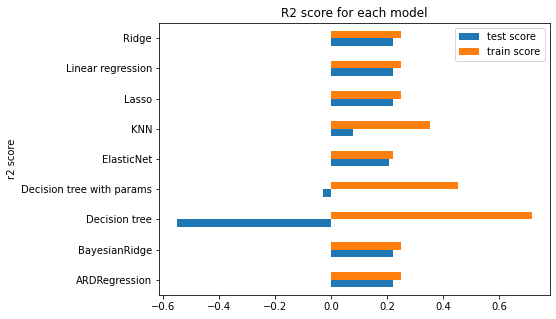

In [43]:
f, ax = plt.subplots(1, figsize=(7, 5))
covid_cases_results.plot.barh(ax=ax)
ax.set_title('R2 score for each model')
ax.set_ylabel('r2 score')

#### Based on the results we can see that all algorithms have pretty low test R2 score
#### Decision tree with default parameters performed worst. All linear regression algorithms perform similarly and reached around 0.2 r2 score
#### In conclusion, we cannot predict crime rates based on monthly covid cases

#### Now we will use all columns and try to see if models perform better 

In [44]:
X = final_data.drop(labels=['year', 'month', 'Nusikalstamos veikos'], axis=1)
Y = final_data['Nusikalstamos veikos']

covid_results = evaluate_models(X, Y, models, r2_score, n_splits)

Text(0.5, 1.0, 'Results')

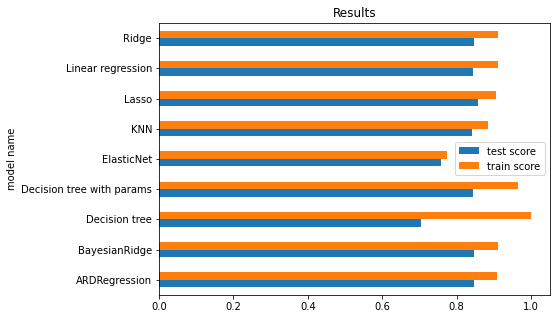

In [45]:
f, ax = plt.subplots(1, figsize=(7, 5))
covid_results.plot.barh(ax=ax)
ax.set_title('Results')

#### Using all columns we reach better results, most models have higher than 0.6 score on test set. 
#### All models except decision tree with defaults parameters and elastic net reached r2 score on test set above 0.8. 
#### Such score indicates, that it's possible to predict covid rates using full covid data: number of cases, deaths, age groups and gender